In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
A549_rep5 = pd.read_csv("A549_directRNA_replicate5_run1.csv")
A549_rep6 = pd.read_csv("A549_directRNA_replicate6_run1.csv")
Hct116_rep3_run1 = pd.read_csv("Hct116_directRNA_replicate3_run1.csv")
Hct116_rep3_run4 = pd.read_csv("Hct116_directRNA_replicate3_run4.csv")
Hct116_rep4 = pd.read_csv("Hct116_directRNA_replicate4_run3.csv")
HepG2_rep5 = pd.read_csv("HepG2_directRNA_replicate5_run2.csv")
HepG2_rep6 = pd.read_csv("HepG2_directRNA_replicate6_run1.csv")
K562_rep4 = pd.read_csv("K562_directRNA_replicate4_run1.csv")
K562_rep5 = pd.read_csv("K562_directRNA_replicate5_run1.csv")
K562_rep6 = pd.read_csv("K562_directRNA_replicate6_run1.csv")
MCF7_rep3 = pd.read_csv("MCF7_directRNA_replicate3_run1.csv")
MCF7_rep4 = pd.read_csv("MCF7_directRNA_replicate4_run1.csv")

In [3]:
#add cell line
A549_rep5['cell_line'] = 'A549'
A549_rep6['cell_line'] = 'A549'
Hct116_rep3_run1['cell_line'] = 'Hct116'
Hct116_rep3_run4['cell_line'] = 'Hct116'
Hct116_rep4['cell_line'] = 'Hct116'
HepG2_rep5['cell_line'] = 'HepG2'
HepG2_rep6['cell_line'] = 'HepG2'
K562_rep4['cell_line'] = 'K562'
K562_rep5['cell_line'] = 'K562'
K562_rep6['cell_line'] = 'K562'
MCF7_rep3['cell_line'] = 'MCF7'
MCF7_rep4['cell_line'] = 'MCF7'


In [4]:
#gene_data
gene_data = pd.read_csv("merged_data.csv")
distinct_gene_transcript_pairs = gene_data[['gene_id', 'transcript_id']].drop_duplicates()

In [5]:
#add gene_id
A549_rep5 = A549_rep5.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
A549_rep6 = A549_rep6.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
Hct116_rep3_run1 = Hct116_rep3_run1.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
Hct116_rep3_run4 = Hct116_rep3_run4.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
Hct116_rep4 = Hct116_rep4.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
HepG2_rep5 = HepG2_rep5.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
HepG2_rep6 = HepG2_rep6.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
K562_rep4 = K562_rep4.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
K562_rep5 = K562_rep5.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
K562_rep6 = K562_rep6.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
MCF7_rep3 = MCF7_rep3.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")
MCF7_rep4 = MCF7_rep4.merge(distinct_gene_transcript_pairs, on=["transcript_id"], how="left")


In [6]:
#keep 'ENST' only
A549_rep5 = A549_rep5[A549_rep5['transcript_id'].str.startswith("ENST")]
A549_rep6 = A549_rep6[A549_rep6['transcript_id'].str.startswith("ENST")]
Hct116_rep3_run1 = Hct116_rep3_run1[Hct116_rep3_run1['transcript_id'].str.startswith("ENST")]
Hct116_rep3_run4 = Hct116_rep3_run4[Hct116_rep3_run4['transcript_id'].str.startswith("ENST")]
Hct116_rep4 = Hct116_rep4[Hct116_rep4['transcript_id'].str.startswith("ENST")]
HepG2_rep5 = HepG2_rep5[HepG2_rep5['transcript_id'].str.startswith("ENST")]
HepG2_rep6 = HepG2_rep6[HepG2_rep6['transcript_id'].str.startswith("ENST")]
K562_rep4 = K562_rep4[K562_rep4['transcript_id'].str.startswith("ENST")]
K562_rep5 = K562_rep5[K562_rep5['transcript_id'].str.startswith("ENST")]
K562_rep6 = K562_rep6[K562_rep6['transcript_id'].str.startswith("ENST")]
MCF7_rep3 = MCF7_rep3[MCF7_rep3['transcript_id'].str.startswith("ENST")]
MCF7_rep4 = MCF7_rep4[MCF7_rep4['transcript_id'].str.startswith("ENST")]



In [7]:
A549 = pd.concat([A549_rep5, A549_rep6], ignore_index=True)
Hct116_to_concatenate = [Hct116_rep3_run1, Hct116_rep3_run4, Hct116_rep4]
Hct116 = pd.concat(Hct116_to_concatenate, ignore_index=True)
HepG2 = pd.concat([HepG2_rep5,HepG2_rep6], ignore_index=True)
K562_to_concatenate = [K562_rep4, K562_rep5, K562_rep6]
K562 = pd.concat(K562_to_concatenate, ignore_index=True)
MCF7 = pd.concat([MCF7_rep3,MCF7_rep4], ignore_index=True)

In [8]:
#add predict_label
A549['predict_label'] = A549['probability'].apply(lambda x: 0 if x < 0.5 else 1)
Hct116['predict_label'] = Hct116['probability'].apply(lambda x: 0 if x < 0.5 else 1)
HepG2['predict_label'] = HepG2['probability'].apply(lambda x: 0 if x < 0.5 else 1)
K562['predict_label'] = K562['probability'].apply(lambda x: 0 if x < 0.5 else 1)
MCF7['predict_label'] = MCF7['probability'].apply(lambda x: 0 if x < 0.5 else 1)

In [9]:
A549_count_1 = (A549['predict_label'] == 1).sum()
A549_percentage = ((A549_count_1)/ len(A549))* 100
Hct116_count_1 = (Hct116['predict_label'] == 1).sum()
Hct116_percentage = ((Hct116_count_1)/ len(Hct116))* 100
HepG2_count_1 = (HepG2['predict_label'] == 1).sum()
HepG2_percentage = ((HepG2_count_1)/ len(HepG2))* 100
MCF7_count_1 = (MCF7['predict_label'] == 1).sum()
MCF7_percentage = ((MCF7_count_1)/ len(MCF7))* 100
K562_count_1 = (K562['predict_label'] == 1).sum()
K562_percentage = ((K562_count_1)/ len(K562))* 100

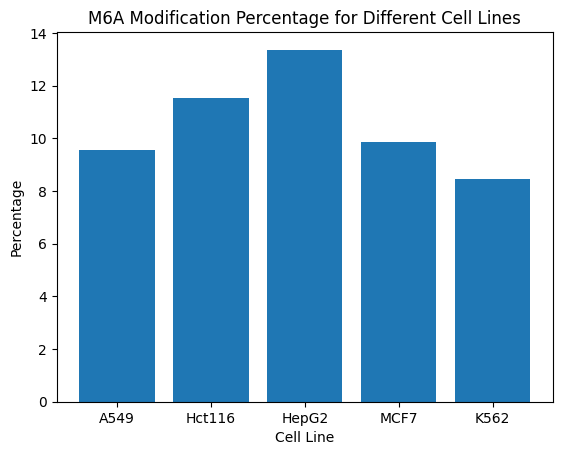

In [11]:
import matplotlib.pyplot as plt

cell_lines = ['A549', 'Hct116', 'HepG2', 'MCF7', 'K562']
percentages = [A549_percentage, Hct116_percentage, HepG2_percentage, MCF7_percentage, K562_percentage]

plt.bar(cell_lines, percentages)
plt.xlabel('Cell Line')
plt.ylabel('Percentage')
plt.title('M6A Modification Percentage for Different Cell Lines')
plt.show()

plt.show()

In [12]:
A549_grouped = A549.groupby("gene_id")
A549_gene_modification = A549_grouped['predict_label'].mean()
A549_sorted_genes = A549_gene_modification.sort_values(ascending=False)
A549_top_10_highly_modified_genes = A549_sorted_genes.head(10)

Hct116_grouped = Hct116.groupby("gene_id")
Hct116_gene_modification = Hct116_grouped['predict_label'].mean()
Hct116_sorted_genes = Hct116_gene_modification.sort_values(ascending=False)
Hct116_top_10_highly_modified_genes = Hct116_sorted_genes.head(10)

HepG2_grouped = HepG2.groupby("gene_id")
HepG2_gene_modification = HepG2_grouped['predict_label'].mean()
HepG2_sorted_genes = HepG2_gene_modification.sort_values(ascending=False)
HepG2_top_10_highly_modified_genes = HepG2_sorted_genes.head(10)

K562_grouped = K562.groupby("gene_id")
K562_gene_modification = K562_grouped['predict_label'].mean()
K562_sorted_genes = K562_gene_modification.sort_values(ascending=False)
K562_top_10_highly_modified_genes = K562_sorted_genes.head(10)

MCF7_grouped = MCF7.groupby("gene_id")
MCF7_gene_modification = MCF7_grouped['predict_label'].mean()
MCF7_sorted_genes = MCF7_gene_modification.sort_values(ascending=False)
MCF7_top_10_highly_modified_genes = MCF7_sorted_genes.head(10)


In [13]:
combined_data = pd.concat([A549, Hct116, HepG2, K562, MCF7], ignore_index=True)
grouped = combined_data.groupby("gene_id")

gene_modification_proportion = grouped['predict_label'].mean()
threshold = 0.6
highly_modified_genes = gene_modification_proportion[gene_modification_proportion >= threshold]

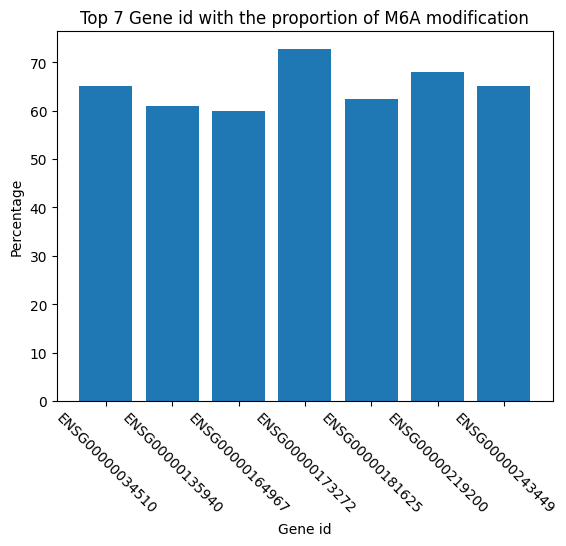

In [14]:
combined_data = pd.concat([A549, Hct116, HepG2, K562, MCF7], ignore_index=True)
grouped = combined_data.groupby("gene_id")

gene_modification_proportion = grouped['predict_label'].mean()
threshold = 0.6
highly_modified_genes = gene_modification_proportion[gene_modification_proportion >= threshold]
gene_id = ['ENSG00000034510', 'ENSG00000135940', 'ENSG00000164967', 'ENSG00000173272', 'ENSG00000181625', 'ENSG00000219200', 'ENSG00000243449']
proportion = [65.1515, 61.0169, 60.0000, 72.7273, 62.3762, 68.0412, 65.1515]

plt.bar(gene_id, proportion)
plt.xlabel('Gene id',)
plt.ylabel('Percentage')
plt.xticks(rotation=-45)
plt.title('Top 7 Gene id with the proportion of M6A modification')
plt.show()


In [130]:
grouped = combined_data.groupby(['cell_line', 'transcript_id'])
transcript_modification_proportion = grouped['predict_label'].mean()
sorted_transcripts = transcript_modification_proportion.groupby('cell_line', group_keys=False).apply(lambda x: x.sort_values(ascending=False))
top_10_transcripts = sorted_transcripts.groupby('cell_line').head(10)
print(top_10_transcripts)

cell_line  transcript_id    
A549       ENST00000544681      1.000000
           ENST00000553176      1.000000
           ENST00000309451      0.833333
           ENST00000552842      0.750000
           ENST00000568583      0.750000
           ENST00000258424      0.700000
           ENST00000567736      0.693182
           ENST00000380466      0.692308
           ENST00000456586      0.666667
           ENST00000344102      0.666667
Hct116     ENST00000630492      1.000000
           ENST00000591160      1.000000
           ENST00000601916      1.000000
           ENST00000585786      0.916667
           ENST00000380466      0.794872
           ENST00000309451      0.777778
           ENST00000338370      0.761905
           ENST00000387409      0.750000
           ENST00000546395      0.750000
           ENST00000389462      0.750000
HepG2      ENST00000524237      1.000000
           ENST00000471679      1.000000
           ENST00000562842      1.000000
           ENST00000585895  